In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Nous allons montrer un exemple pratique de régression linéaire, en utilisant cette fois la librairie scikit-learn, une librairie orientée machine learning, très simple à prendre en main.

L'exemple choisi est un dataset contenant le poids moyen du corps et du cerveau de 62 mammifères différents. Le jeu de données a été récupéré à cette adresse : http://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html

In [19]:
!head -n 40 x01.txt #execution d'une commande bash depuis ipython

#  x01.txt
#
#  Reference:
#
#    Helmut Spaeth,
#    Mathematical Algorithms for Linear Regression,
#    Academic Press, 1991, page 304,
#    ISBN 0-12-656460-4.
#
#    S Weisberg,
#    Applied Linear Regression,
#    Wiley, 1980, pages 128-129.
#
#  Discussion:
#
#    The data records the average weight of the brain and body for
#    a number of mammal species.  
#
#    There are 62 rows of data.  The 3 data columns include:
#
#      I,  the index,
#      A1, the brain weight;
#      B,  the body weight.
#
#    We seek a model of the form:
#
#      B = A1 * X1.
#
3 columns
62 rows
Index
Brain Weight
Body Weight
 1     3.385    44.500
 2     0.480    15.500
 3     1.350     8.100
 4   465.000   423.000
 5    36.330   119.500
 6    27.660   115.000
 7    14.830    98.200


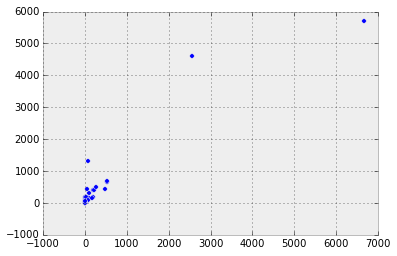

In [2]:
data = np.loadtxt('x01.txt', skiprows=33)
x, y = data[:,1], data[:,2]
plt.scatter(x,y)
plt.show()

Scikit-learn dispose de différents modèles d'analyse prédictive, dont un modèle de régression linéaire. La description de la classe est disponible ic : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [20]:
from sklearn import linear_model
x = x.reshape(62,1) #nécessaire pour que scikit-learn fonctionne
y = y.reshape(62,1)

In [5]:
regr = linear_model.LinearRegression() #instanciation du modèle
regr.fit(x,y)
regr.coef_, regr.intercept_

(array([[ 0.96649637]]), array([ 91.00439621]))

Le modèle déterminé par scikit-learn correspond à une relation dy type 

Y ~ coef\_ * X + intercept\_

Nous pouvons aussi accéder au $R^2$. Pour rappel $R^2=1$ si le modèle décrit totalement la relation entre y et x, et 0 si il n'y a aucune relation. En fait, $R^2$ est le carré du [coefficient de correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) entre x et y.

In [6]:
regr.score(x,y)

0.87266208430433312

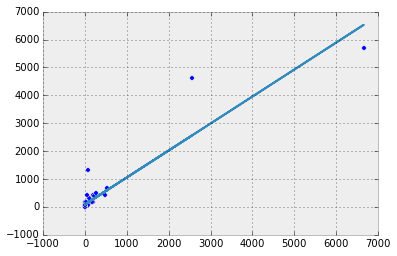

In [7]:
plt.scatter(x, y)
plt.plot(x, regr.predict(x))
plt.show()

Ce modèle semble fonctionner, mais est-ce le meilleur modèle possible ? On constate par exemple que 3 points sont assez éloignés de la courbe, alors que l'ensemble des autres points sont regroupés en bas à gauche.

Un bon réflexe pour diagnostiquer une régression linéaire consiste à regarder les résidus. Ils sont sensé correspondre à des erreurs gaussiennes.

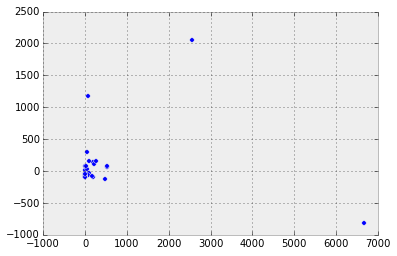

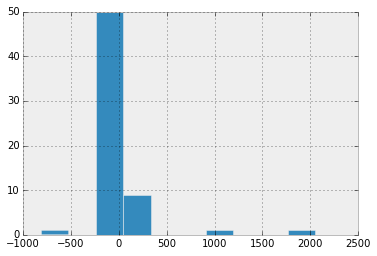

In [24]:
residuals = y-regr.predict(x)
plt.scatter(x, residuals)
plt.figure()
plt.hist(y-regr.predict(x))
plt.show()

La distribution ne semble pas très normale !

Elle semble plutôt correspondre à une loi de puissance, où une grande majorité des données est concentrée sur un petit sous-ensemble, avant de décroitre très rapidement.

<img src='img/640px-Long_tail.svg.png'>
https://fr.wikipedia.org/wiki/Loi_de_puissance

La loi correspond plutôt à $y \sim ax^\gamma$. Pour palier à ce désagrément, nous allons refaire l'analyse, mais le logarithme des données (pourquoi ?).

In [25]:
x_log = np.log(x)
y_log = np.log(y)

In [26]:
regr_log = linear_model.LinearRegression()
regr_log.fit(x_log, y_log)
regr_log.coef_, regr_log.intercept_

(array([[ 0.75168594]]), array([ 2.13478868]))

In [27]:
regr_log.score(x_log, y_log)

0.92078371690272554

On constate déjà que $R^2$ est bien meilleur.

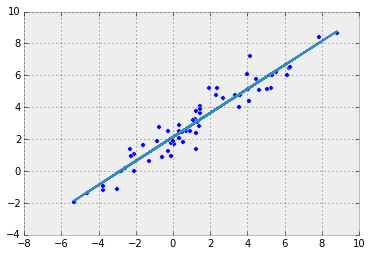

In [12]:
plt.scatter(x_log, y_log)
plt.plot(x_log, regr_log.predict(x_log))
plt.show()

L'analyse des résidus confirme notre modèle.

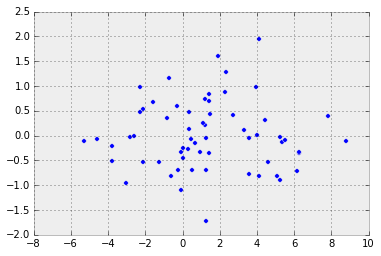

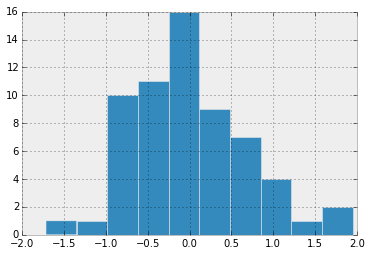

In [13]:
plt.scatter(x_log, y_log-regr_log.predict(x_log))
plt.figure()
plt.hist(y_log-regr_log.predict(x_log))
plt.show()